<a href="https://colab.research.google.com/github/Sahana200301/CODSOFT/blob/main/CODSOFT_TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [13]:
import pandas as pd
data=pd.read_csv("movies_ds.csv", encoding='ISO-8859-1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Data Analysis

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [15]:
data.shape

(15509, 10)

In [16]:
data.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [17]:
data.isna().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [18]:
rating_distribution = data['Rating'].value_counts().sort_index()
rating_distribution

,count
Rating,
1.1,1
1.4,1
1.6,3
1.7,5
1.8,4
...,...
9.3,9
9.4,4
9.6,1


# Data Analysis Visualization

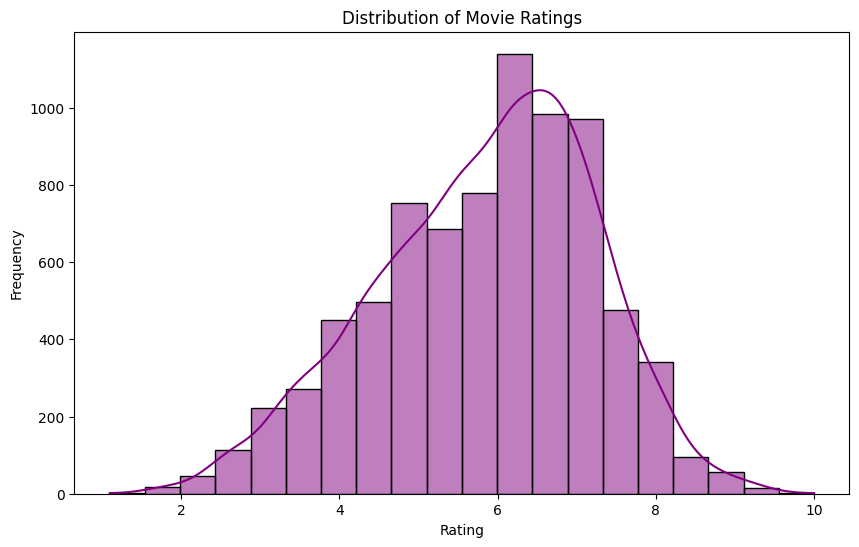

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], kde=True, bins=20, color='purple')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

<ipython-input-20-e7c31c61862e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='muted')


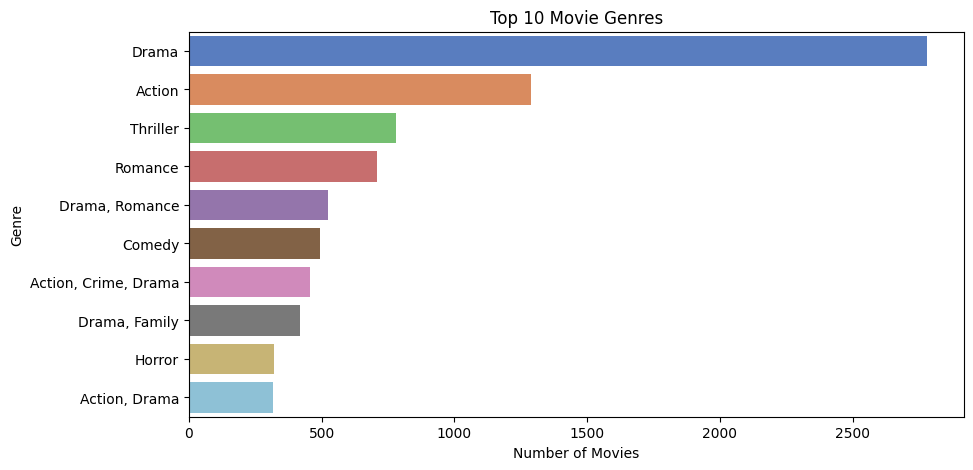

In [20]:
top_genres = data['Genre'].value_counts().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# DATA PREPROCESSING

In [21]:
# Filling missing values
data['Rating'].fillna(data['Rating'].median(), inplace=True)
data['Votes'] = data['Votes'].replace({',': '', '\$': '', 'M': '000000'}, regex=True)
data['Votes'] = pd.to_numeric(data['Votes'], errors='coerce').fillna(0).astype(int)
data['Duration'] = data['Duration'].str.replace(' min', '').astype(float)
data['Duration'].fillna(data['Duration'].median(), inplace=True)

for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    data[col].fillna('Unknown', inplace=True)

categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.drop(columns=['Name', 'Year'], inplace=True)

<ipython-input-21-503350ee5669>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].median(), inplace=True)
<ipython-input-21-503350ee5669>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [22]:
print("Preprocessed Data:\n", data.head(10))

Preprocessed Data:
    Duration  Genre  Rating  Votes  Director  Actor 1  Actor 2  Actor 3
0     131.0    299     6.0      0      1926     2250      800     3108
1     109.0    299     7.0      8      1548     3280     4791      527
2      90.0    351     6.0      0      5123     3713     2866     3450
3     110.0    228     4.4     35      3319     2917     1504     4020
4     105.0    299     6.0      0       385     3112     3462      405
5     147.0    197     4.7    827      3800      895      123     3829
6     142.0    366     7.4   1086      4993     1698     2359     4763
7      59.0    262     6.0      0       475     4388     4558     4481
8      82.0    418     5.6    326       305     4655     2482     1851
9     116.0     38     4.0     11       987      677     1197      826


# Feature Engineering

In [23]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
# Splitting Genre into individual binary columns
def split_genres(text):
    if isinstance(text, str):
        return text.lower().split(",")
    return []

genre_vectorizer = CountVectorizer(tokenizer=split_genres, binary=True)
genre_features = genre_vectorizer.fit_transform(data['Genre'].astype(str)).toarray()
genre_feature_names = genre_vectorizer.get_feature_names_out()

genre_df = pd.DataFrame(genre_features, columns=genre_feature_names)
data = pd.concat([data.reset_index(drop=True), genre_df], axis=1)
scaler = MinMaxScaler()
data[['Votes', 'Duration']] = scaler.fit_transform(data[['Votes', 'Duration']])

data.drop(columns=['Genre'], inplace=True)
print("Feature Engineered Data:\n", data.head())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Feature Engineered Data:
    Duration  Rating     Votes  Director  Actor 1  Actor 2  Actor 3  0  1  10  \
0  0.404389     6.0  0.000000      1926     2250      800     3108  0  0   0   
1  0.335423     7.0  0.000014      1548     3280     4791      527  0  0   0   
2  0.275862     6.0  0.000000      5123     3713     2866     3450  0  0   0   
3  0.338558     4.4  0.000059      3319     2917     1504     4020  0  0   0   
4  0.322884     6.0  0.000000       385     3112     3462      405  0  0   0   

   ...  90  91  92  93  94  95  96  97  98  99  
0  ...   0   0   0   0   0   0   0   0   0   0  
1  ...   0   0   0   0   0   0   0   0   0   0  
2  ...   0   0   0   0   0   0   0   0   0   0  
3  ...   0   0   0   0   0   0   0   0   0   0  
4  ...   0   0   0   0   0   0   0   0   0   0  

[5 rows x 493 columns]


# LINEAR REGRESSION

In [24]:
X = data.drop(columns=['Rating'])
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("Comparison of Actual vs Predicted Ratings:")
print(comparison.head())

Mean Squared Error (MSE): 0.92
R² Score: 0.05
Comparison of Actual vs Predicted Ratings:
   Actual  Predicted
0     6.0   5.888231
1     6.8   6.187731
2     6.0   6.053913
3     6.0   5.984252
4     6.0   5.937937


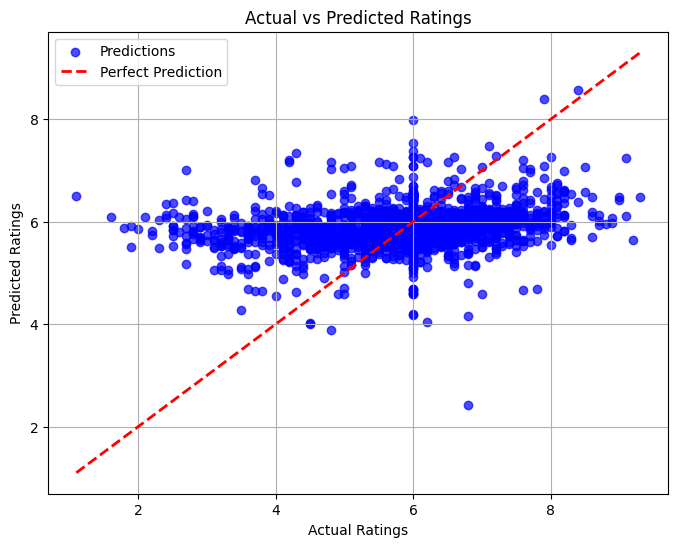

In [25]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()

# RANDOM FOREST REGRESSOR

In [26]:
X = data.drop(columns=['Rating'])
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("Comparison of Actual vs Predicted Ratings:")
print(comparison.head())

Mean Squared Error (MSE): 0.75
R² Score: 0.23
Comparison of Actual vs Predicted Ratings:
   Actual  Predicted
0     6.0      6.000
1     6.8      6.711
2     6.0      6.000
3     6.0      6.000
4     6.0      6.000


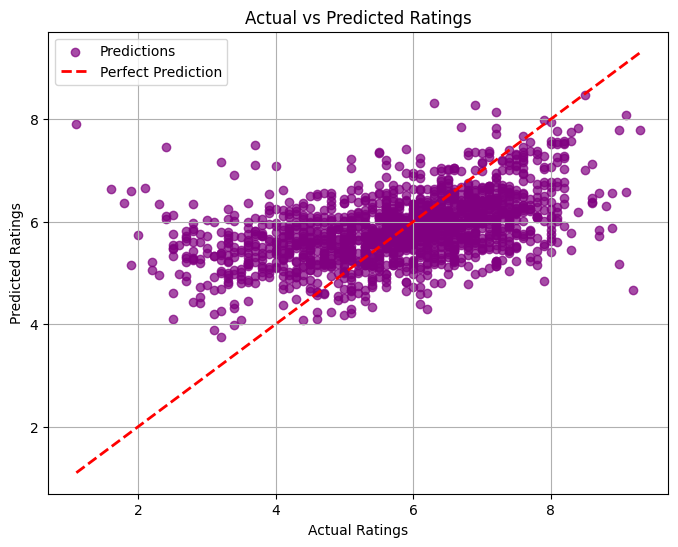

In [27]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='purple', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.legend()
plt.grid(True)
plt.show()